In [16]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [18]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [19]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [20]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [21]:
# Train the model
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Update learning rate
    scheduler.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [5/60], Loss: 2.6684
Epoch [10/60], Loss: 1.3005
Epoch [15/60], Loss: 0.7461
Epoch [20/60], Loss: 0.5212
Epoch [25/60], Loss: 0.4872
Epoch [30/60], Loss: 0.4773
Epoch [35/60], Loss: 0.4681
Epoch [40/60], Loss: 0.4598
Epoch [45/60], Loss: 0.4576
Epoch [50/60], Loss: 0.4568
Epoch [55/60], Loss: 0.4560
Epoch [60/60], Loss: 0.4553


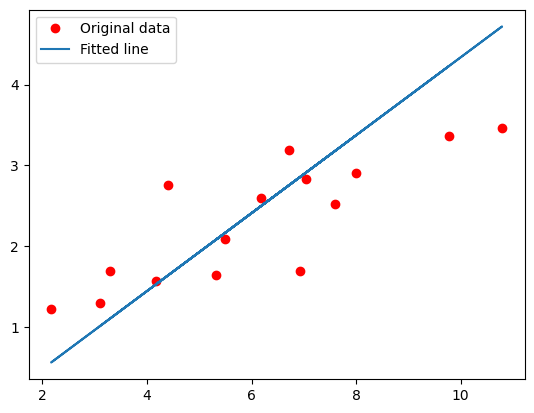

In [22]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [23]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

In [24]:
# R-squared calculation
ss_res = np.sum((y_train - predicted) ** 2)
ss_tot = np.sum((y_train - np.mean(y_train)) ** 2)
r2_score = 1 - (ss_res / ss_tot)
print(f'R-squared: {r2_score}')

R-squared: 0.16320037841796875


In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
# Define the polynomial degree (e.g., 2 for quadratic, 3 for cubic)
degree = 2  # You can experiment with higher degrees if needed
poly = PolynomialFeatures(degree)


In [34]:
x_train = (x_train - np.mean(x_train)) / np.std(x_train)
y_train = (y_train - np.mean(y_train)) / np.std(y_train)


In [35]:
# Transform input data to polynomial features
x_train_poly = poly.fit_transform(x_train)  # x_train now has polynomial features


In [36]:
# Update input size to match the new number of features from polynomial transformation
input_size = x_train_poly.shape[1]  # Updated input size after polynomial transformation
model = nn.Linear(input_size, output_size)  # Keep output size the same


In [37]:
# Convert numpy arrays to torch tensors for polynomial features
inputs = torch.from_numpy(x_train_poly)
targets = torch.from_numpy(y_train)

l2_lambda = 0.001  # Adjust this value based on how much regularization you want
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Add L2 regularization (weight decay)
    l2_reg = torch.tensor(0.)
    for param in model.parameters():
        l2_reg += torch.norm(param)**2
    
    loss += l2_lambda * l2_reg
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

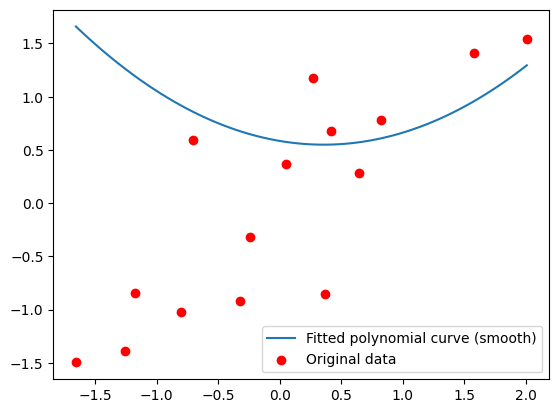

In [38]:
x_grid = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)
x_grid_poly = poly.fit_transform(x_grid)
predicted_grid = model(torch.from_numpy(x_grid_poly)).detach().numpy()

plt.plot(x_grid, predicted_grid, label='Fitted polynomial curve (smooth)')
plt.scatter(x_train, y_train, color='red', label='Original data')
plt.legend()
plt.show()
